## Importing libraries

In [1]:
import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [2]:
data = pd.read_csv('/Volumes/GoogleDrive/My Drive/Job Applications/JustWatch_challenge/Predictive Analytics dataset.csv')

In [3]:
data.head()

,PROJECT_ID,TYPE,CAMPAIGN_COUNTRY,CLUSTER,DEMOGRAPHY,SURVEY_DATE,RELEASE_DATE,IMPRESSIONS,YES_ANSWERS,NO_ANSWERS,NA_ANSWERS
0,project_2,wi,AT,SBC,FEMALE_U25,2020-10-10,2020-10-23,4855,13,3,1
1,project_1,vc,ES,Cast,FEMALE_25to34,2020-08-18,2020-03-18,7224,4,8,10
2,project_4,wi,DE,GermanPostWarHistory,MALE_U25,2020-07-15,2020-09-25,2216,13,10,8
3,project_5,vc,FR,PrimeVideoFans,MALE_U25,2020-04-29,2020-04-15,5957,7,32,14
4,project_4,vc,DE,Core,MALE_O55,2020-10-13,2020-09-25,1462,14,10,9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3058 entries, 0 to 3057
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PROJECT_ID        3058 non-null   object
 1   TYPE              3058 non-null   object
 2   CAMPAIGN_COUNTRY  3058 non-null   object
 3   CLUSTER           3058 non-null   object
 4   DEMOGRAPHY        3058 non-null   object
 5   SURVEY_DATE       3058 non-null   object
 6   RELEASE_DATE      3058 non-null   object
 7   IMPRESSIONS       3058 non-null   int64 
 8   YES_ANSWERS       3058 non-null   int64 
 9   NO_ANSWERS        3058 non-null   int64 
 10  NA_ANSWERS        3058 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 262.9+ KB


## Cleaning

In [5]:
data.columns = data.columns.str.lower()
data.columns

Index(['project_id', 'type', 'campaign_country', 'cluster', 'demography',
       'survey_date', 'release_date', 'impressions', 'yes_answers',
       'no_answers', 'na_answers'],
      dtype='object')

In [6]:
from datetime import datetime

In [7]:
data["survey_date"] = pd.to_datetime(data["survey_date"], format='%Y-%m-%d')

In [8]:
data["release_date"] = pd.to_datetime(data["release_date"], format='%Y-%m-%d')

In [9]:
data[['gender', 'age_range']] = data.demography.str.split('_', expand=True)
data

,project_id,type,campaign_country,cluster,demography,survey_date,release_date,impressions,yes_answers,no_answers,na_answers,gender,age_range
0,project_2,wi,AT,SBC,FEMALE_U25,2020-10-10,2020-10-23,4855,13,3,1,FEMALE,U25
1,project_1,vc,ES,Cast,FEMALE_25to34,2020-08-18,2020-03-18,7224,4,8,10,FEMALE,25to34
2,project_4,wi,DE,GermanPostWarHistory,MALE_U25,2020-07-15,2020-09-25,2216,13,10,8,MALE,U25
3,project_5,vc,FR,PrimeVideoFans,MALE_U25,2020-04-29,2020-04-15,5957,7,32,14,MALE,U25
4,project_4,vc,DE,Core,MALE_O55,2020-10-13,2020-09-25,1462,14,10,9,MALE,O55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,project_8,vc,GB,Mixed_Segment_B,MALE_35to44,2020-11-06,2020-10-30,2642,0,0,0,MALE,35to44
3054,project_1,vc,DE,PrimeVideoFans,FEMALE_45to54,2020-07-07,2020-03-18,20428,1,2,7,FEMALE,45to54
3055,project_14,wi,DE,GermanComedyStandUp,FEMALE_35to44,2020-09-14,2020-12-04,2199,4,12,22,FEMALE,35to44
3056,project_8,vc,GB,Control,MALE_U25,2020-11-06,2020-10-30,849,0,0,0,MALE,U25


In [10]:
data.drop(['demography'], axis = 1, inplace = True)

In [11]:
data.isnull().sum()

project_id          0
type                0
campaign_country    0
cluster             0
survey_date         0
release_date        0
impressions         0
yes_answers         0
no_answers          0
na_answers          0
gender              0
age_range           0
dtype: int64

In [12]:
data['diff_survey_release'] = data["release_date"] - data["survey_date"] 
#if it's positive, it means the survey was done before the release if it's negative the survey was done after the release

In [13]:
data['diff_survey_release'] = data['diff_survey_release'].astype('str')

In [14]:
data['diff_survey_release'] = data['diff_survey_release'].str.strip(' days +00:00:00.000000000')

In [15]:
data['diff_survey_release'] = data['diff_survey_release'].astype('int')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3058 entries, 0 to 3057
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   project_id           3058 non-null   object        
 1   type                 3058 non-null   object        
 2   campaign_country     3058 non-null   object        
 3   cluster              3058 non-null   object        
 4   survey_date          3058 non-null   datetime64[ns]
 5   release_date         3058 non-null   datetime64[ns]
 6   impressions          3058 non-null   int64         
 7   yes_answers          3058 non-null   int64         
 8   no_answers           3058 non-null   int64         
 9   na_answers           3058 non-null   int64         
 10  gender               3058 non-null   object        
 11  age_range            3058 non-null   object        
 12  diff_survey_release  3058 non-null   int64         
dtypes: datetime64[ns](2), int64(5), o

In [17]:
data['watching_rate_%'] = (data['yes_answers']*100)/(data['yes_answers']+ data['no_answers']+ data['na_answers'])

In [18]:
data.head()

,project_id,type,campaign_country,cluster,survey_date,release_date,impressions,yes_answers,no_answers,na_answers,gender,age_range,diff_survey_release,watching_rate_%
0,project_2,wi,AT,SBC,2020-10-10,2020-10-23,4855,13,3,1,FEMALE,U25,13,76.470588
1,project_1,vc,ES,Cast,2020-08-18,2020-03-18,7224,4,8,10,FEMALE,25to34,-153,18.181818
2,project_4,wi,DE,GermanPostWarHistory,2020-07-15,2020-09-25,2216,13,10,8,MALE,U25,72,41.935484
3,project_5,vc,FR,PrimeVideoFans,2020-04-29,2020-04-15,5957,7,32,14,MALE,U25,-14,13.207547
4,project_4,vc,DE,Core,2020-10-13,2020-09-25,1462,14,10,9,MALE,O55,-18,42.424242


In [19]:
data.isnull().sum()

project_id               0
type                     0
campaign_country         0
cluster                  0
survey_date              0
release_date             0
impressions              0
yes_answers              0
no_answers               0
na_answers               0
gender                   0
age_range                0
diff_survey_release      0
watching_rate_%        705
dtype: int64

In [20]:
data = data.fillna(0)

## EDA

To understand the distribution of the data I divide the dataset into numerical and categorical, so I can plot their distribution

### Numerical

In [21]:
numerical = data.select_dtypes(exclude=['object', 'datetime64'])
numerical

,impressions,yes_answers,no_answers,na_answers,diff_survey_release,watching_rate_%
0,4855,13,3,1,13,76.470588
1,7224,4,8,10,-153,18.181818
2,2216,13,10,8,72,41.935484
3,5957,7,32,14,-14,13.207547
4,1462,14,10,9,-18,42.424242
...,...,...,...,...,...,...
3053,2642,0,0,0,-7,0.000000
3054,20428,1,2,7,-111,10.000000
3055,2199,4,12,22,81,10.526316
3056,849,0,0,0,-7,0.000000


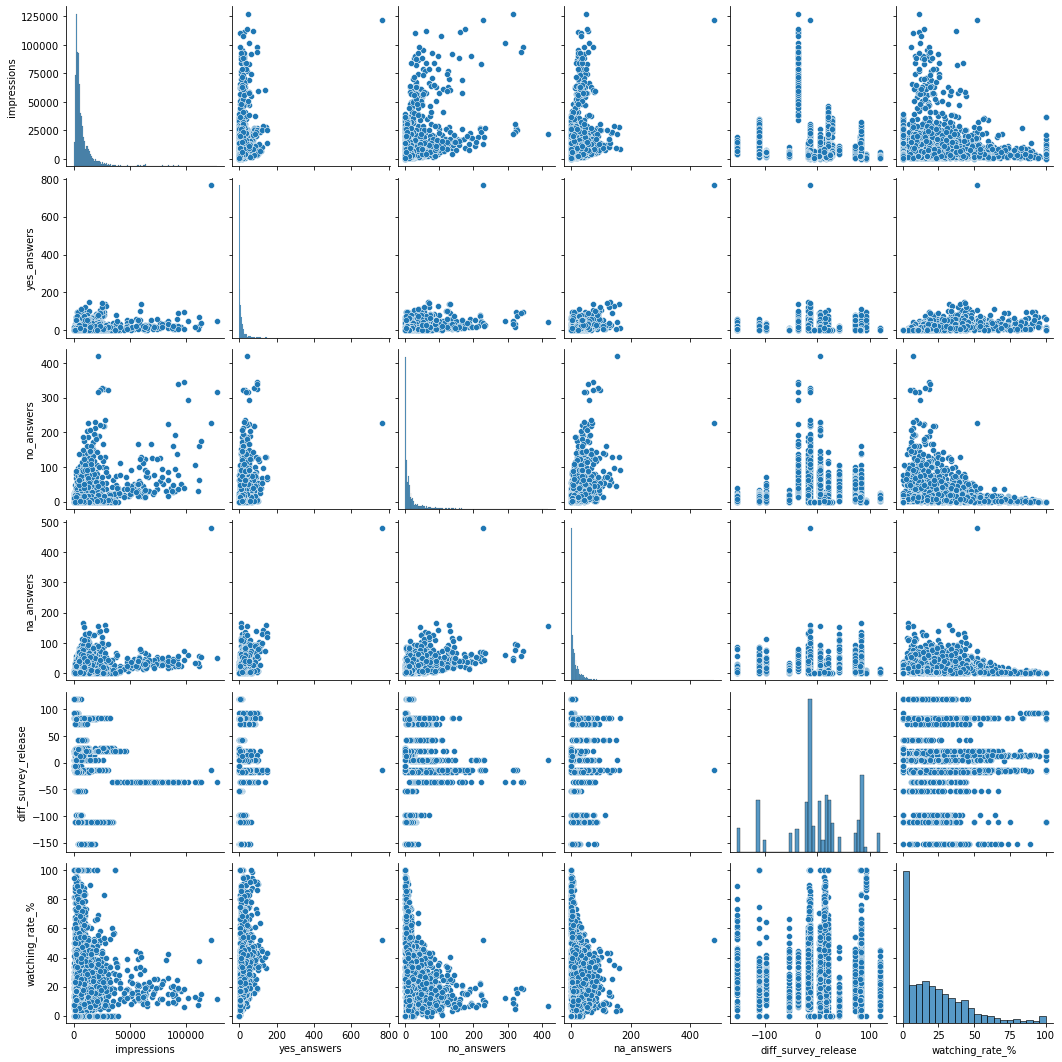

In [22]:
sns.pairplot(numerical)

Searching for multicollinearity between the numerical features

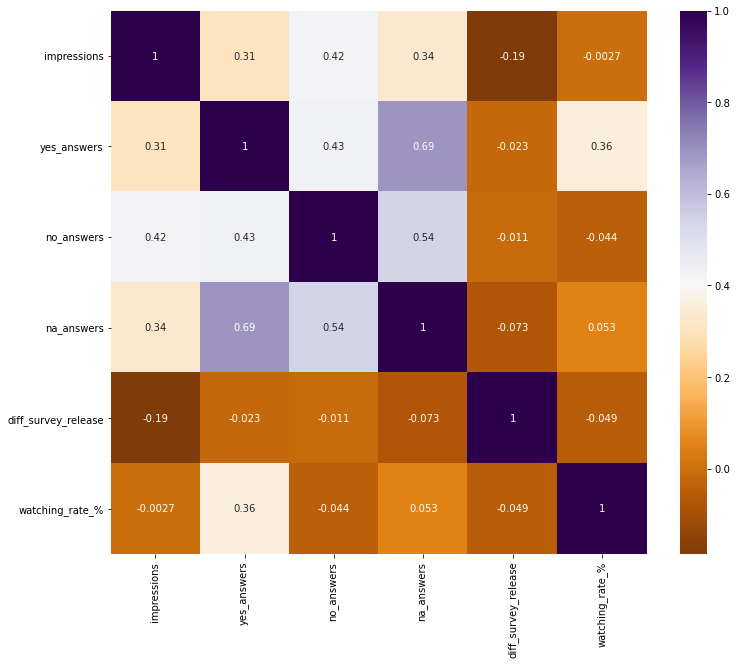

In [23]:
corr = numerical.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            ax=ax,
            cmap='PuOr'
           )

Looks like na_answers correlate with yes_answers. The na_answers can be eventually dropped

### Let's look at distribution of numerical features

In [24]:
import matplotlib.colors as mcolors

def df_hist(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.distplot(df[col])
        
    plt.show()

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

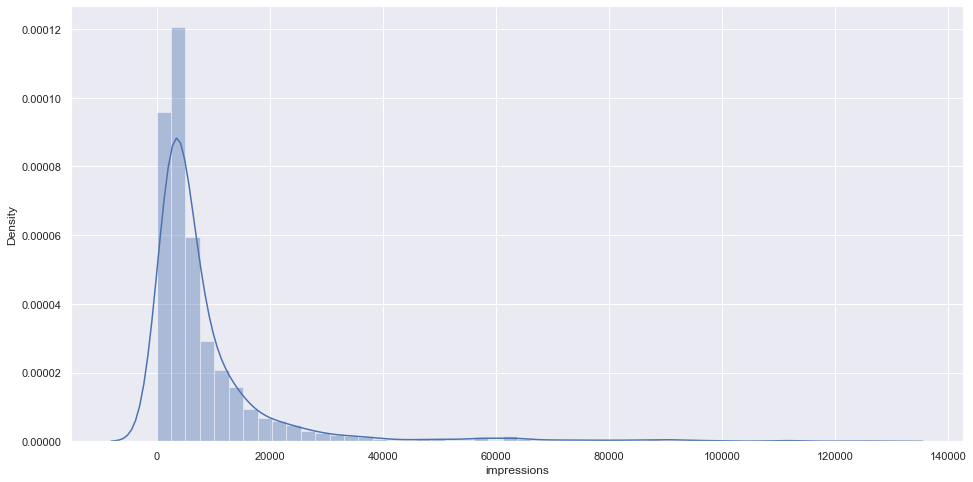

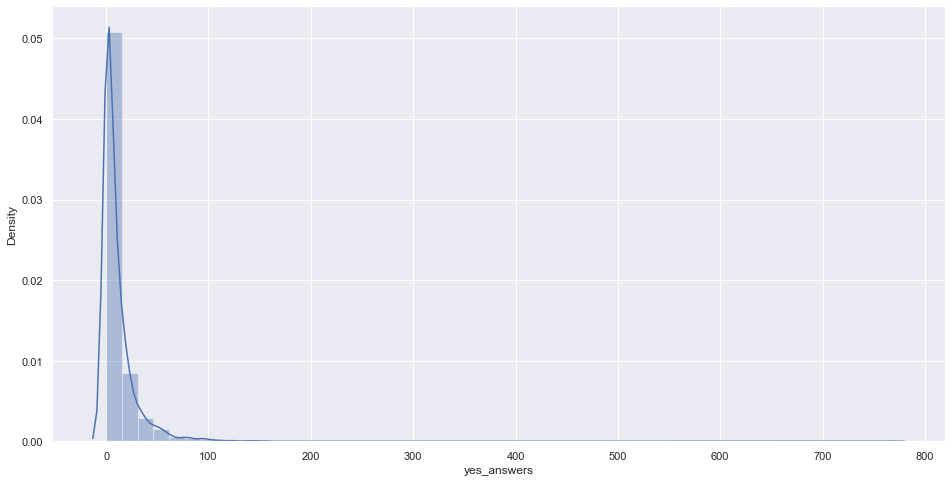

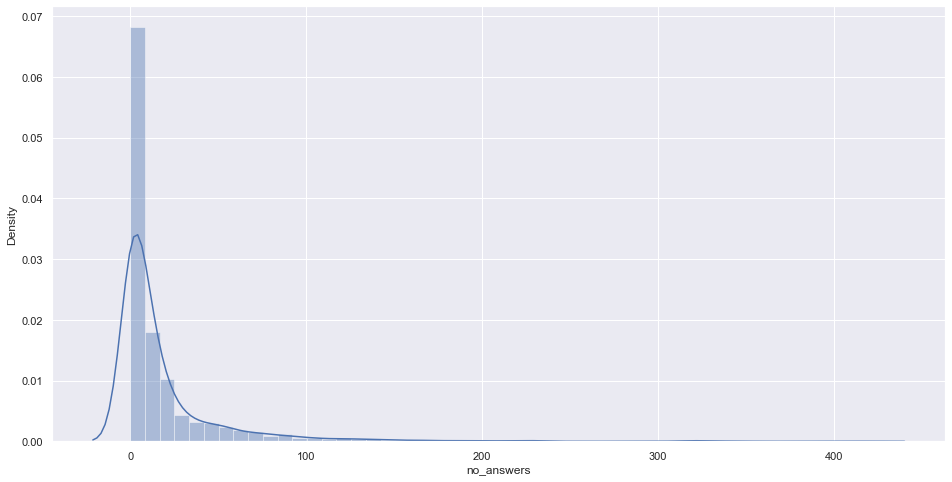

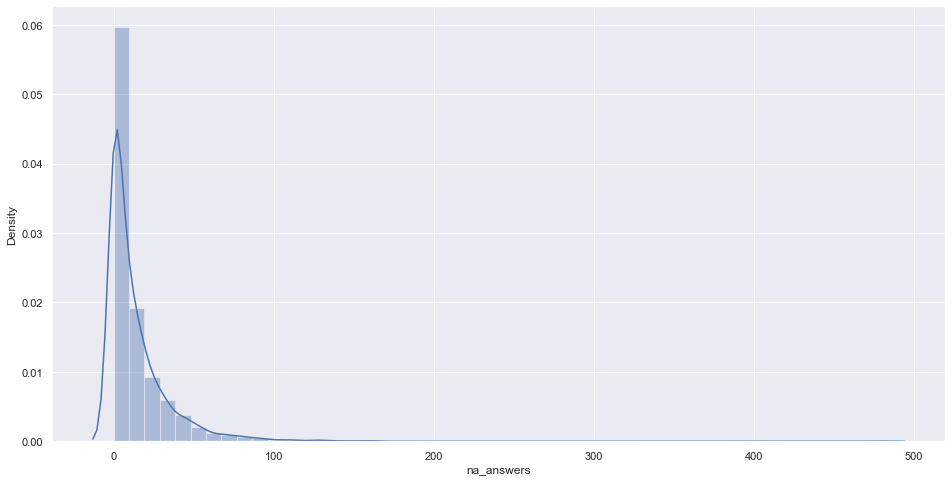

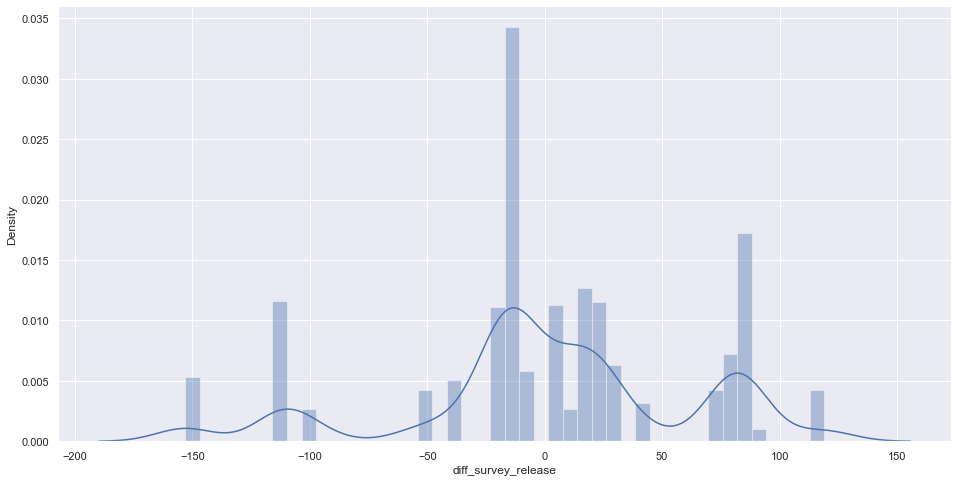

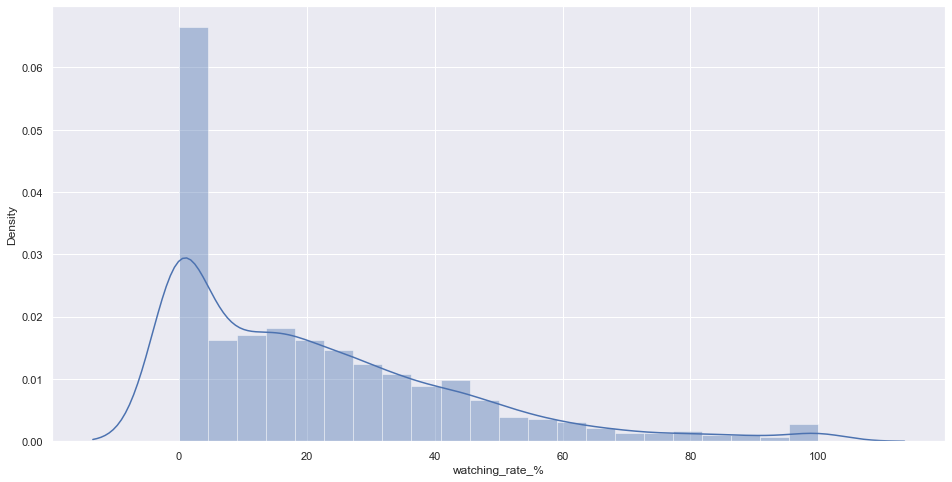

In [25]:
df_hist(numerical);

In [26]:
numerical.describe()

,impressions,yes_answers,no_answers,na_answers,diff_survey_release,watching_rate_%
count,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000
mean,8797.299869,10.825703,18.322760,13.919555,1.622956,21.368984
std,13327.710173,21.541465,35.181191,21.442533,61.045225,22.355608
min,1.000000,0.000000,0.000000,0.000000,-153.000000,0.000000
25%,2579.000000,0.000000,0.000000,0.000000,-17.000000,0.000000
50%,4528.000000,4.000000,6.000000,7.000000,3.000000,16.206700
75%,9060.000000,14.000000,19.000000,19.000000,28.000000,33.333333
max,127473.000000,767.000000,419.000000,481.000000,119.000000,100.000000


It looks like that:
- there is an outlier
- na_answers and yes_answera have a high collinearity, therefore the na_answers colunmn can be dropped

### Categorical

In [27]:
categorical = data.select_dtypes(exclude=['int64', 'float64', 'datetime64'])
categorical

,project_id,type,campaign_country,cluster,gender,age_range
0,project_2,wi,AT,SBC,FEMALE,U25
1,project_1,vc,ES,Cast,FEMALE,25to34
2,project_4,wi,DE,GermanPostWarHistory,MALE,U25
3,project_5,vc,FR,PrimeVideoFans,MALE,U25
4,project_4,vc,DE,Core,MALE,O55
...,...,...,...,...,...,...
3053,project_8,vc,GB,Mixed_Segment_B,MALE,35to44
3054,project_1,vc,DE,PrimeVideoFans,FEMALE,45to54
3055,project_14,wi,DE,GermanComedyStandUp,FEMALE,35to44
3056,project_8,vc,GB,Control,MALE,U25


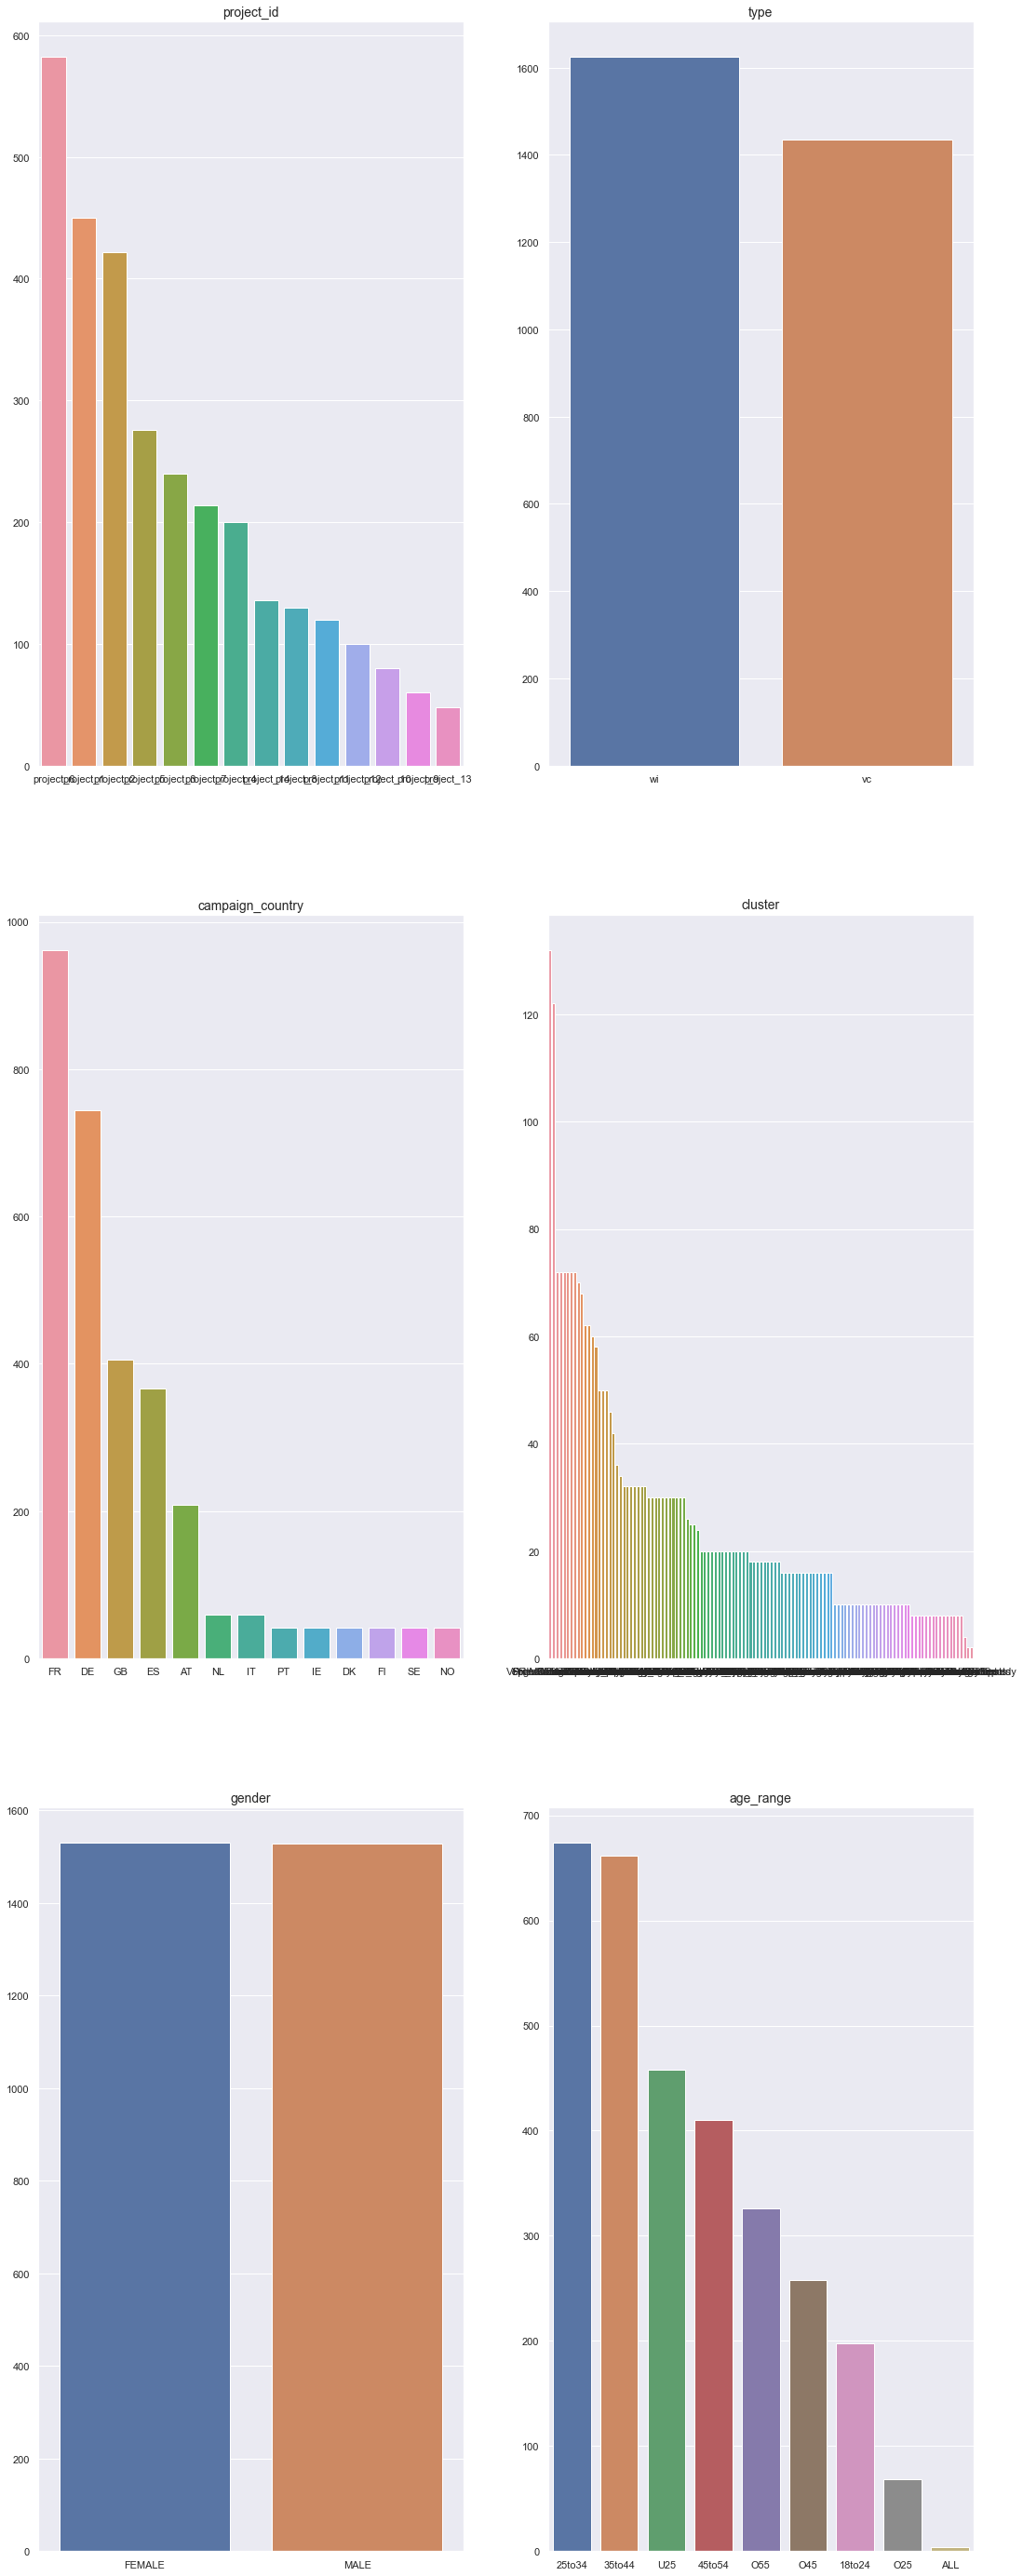

In [28]:
f, axes = plt.subplots(int(categorical.shape[1] / 2), 2, figsize=(18, 50))

for i, col in enumerate(categorical):

    sns.barplot(x = categorical[col].value_counts().index,
                y = categorical[col].value_counts(),
                ax=axes[int(i / 2)][int(i) % 2])  
    axes[int(i / 2)][int(i) % 2].set_title(col, fontsize = 14)
    axes[int(i / 2)][int(i) % 2].set_ylabel("")

plt.show()

In [29]:
data['cluster'].describe()

count               3058
unique               121
top       PrimeVideoFans
freq                 132
Name: cluster, dtype: object

In [30]:
data['age_range'].value_counts()

25to34    674
35to44    662
U25       458
45to54    410
O55       326
O45       258
18to24    198
O25        68
ALL         4
Name: age_range, dtype: int64

In [31]:
data.query("age_range == 'ALL'")

,project_id,type,campaign_country,cluster,survey_date,release_date,impressions,yes_answers,no_answers,na_answers,gender,age_range,diff_survey_release,watching_rate_%
506,project_5,vc,FR,ViewedCP1Spots,2020-04-29,2020-04-15,26807,79,218,51,MALE,ALL,-14,22.701149
819,project_5,vc,FR,ViewedCP2Spots,2020-04-29,2020-04-15,1010,15,0,7,FEMALE,ALL,-14,68.181818
1861,project_5,vc,FR,ViewedCP1Spots,2020-04-29,2020-04-15,122253,767,227,481,FEMALE,ALL,-14,52.000000
1899,project_5,vc,FR,ViewedCP2Spots,2020-04-29,2020-04-15,1153,7,26,6,MALE,ALL,-14,17.948718


In [32]:
data.drop(data[data['age_range'] == 'ALL'].index, inplace = True)

In [33]:
data['age_range'].value_counts()

25to34    674
35to44    662
U25       458
45to54    410
O55       326
O45       258
18to24    198
O25        68
Name: age_range, dtype: int64

In [34]:
def clean_age(x):
    if x == 'U25':
        return '18to24'
    elif x == 'O25':
        return '25to34'
    elif x == 'O45':
        return '45to54'
    else:
        return x

In [35]:
data['age_range'] = list(map(clean_age, data['age_range']))

In [36]:
data['age_range'].value_counts()

25to34    742
45to54    668
35to44    662
18to24    656
O55       326
Name: age_range, dtype: int64

In [37]:
data.head()

,project_id,type,campaign_country,cluster,survey_date,release_date,impressions,yes_answers,no_answers,na_answers,gender,age_range,diff_survey_release,watching_rate_%
0,project_2,wi,AT,SBC,2020-10-10,2020-10-23,4855,13,3,1,FEMALE,18to24,13,76.470588
1,project_1,vc,ES,Cast,2020-08-18,2020-03-18,7224,4,8,10,FEMALE,25to34,-153,18.181818
2,project_4,wi,DE,GermanPostWarHistory,2020-07-15,2020-09-25,2216,13,10,8,MALE,18to24,72,41.935484
3,project_5,vc,FR,PrimeVideoFans,2020-04-29,2020-04-15,5957,7,32,14,MALE,18to24,-14,13.207547
4,project_4,vc,DE,Core,2020-10-13,2020-09-25,1462,14,10,9,MALE,O55,-18,42.424242


In [38]:
total = sum((data['yes_answers'] + data['no_answers'] + data['na_answers']))

In [39]:
data['answer_rate'] = (((data['yes_answers'] + data['no_answers'] + data['na_answers'])/total)*100)

In [40]:
data['positive_rate'] = (data['yes_answers']/total)*100

In [41]:
cluster_by_yes = data.groupby(['cluster', 'type'], as_index=False)['positive_rate'].sum()

In [42]:
cluster_by_yes

,cluster,type,positive_rate
0,Action,vc,0.199510
1,Action,wi,0.086275
2,BarreDancePoleFitnessEnthusiasts,vc,0.170238
3,BarreDancePoleFitnessEnthusiasts,wi,0.077031
4,Berlin,wi,0.013095
...,...,...,...
176,ViewedPrimeVideoCampaigns,wi,0.126331
177,VisuallyArresting,wi,0.099370
178,WomensFavouriteTV,vc,0.373600
179,WomensFavouriteTV,wi,0.022339


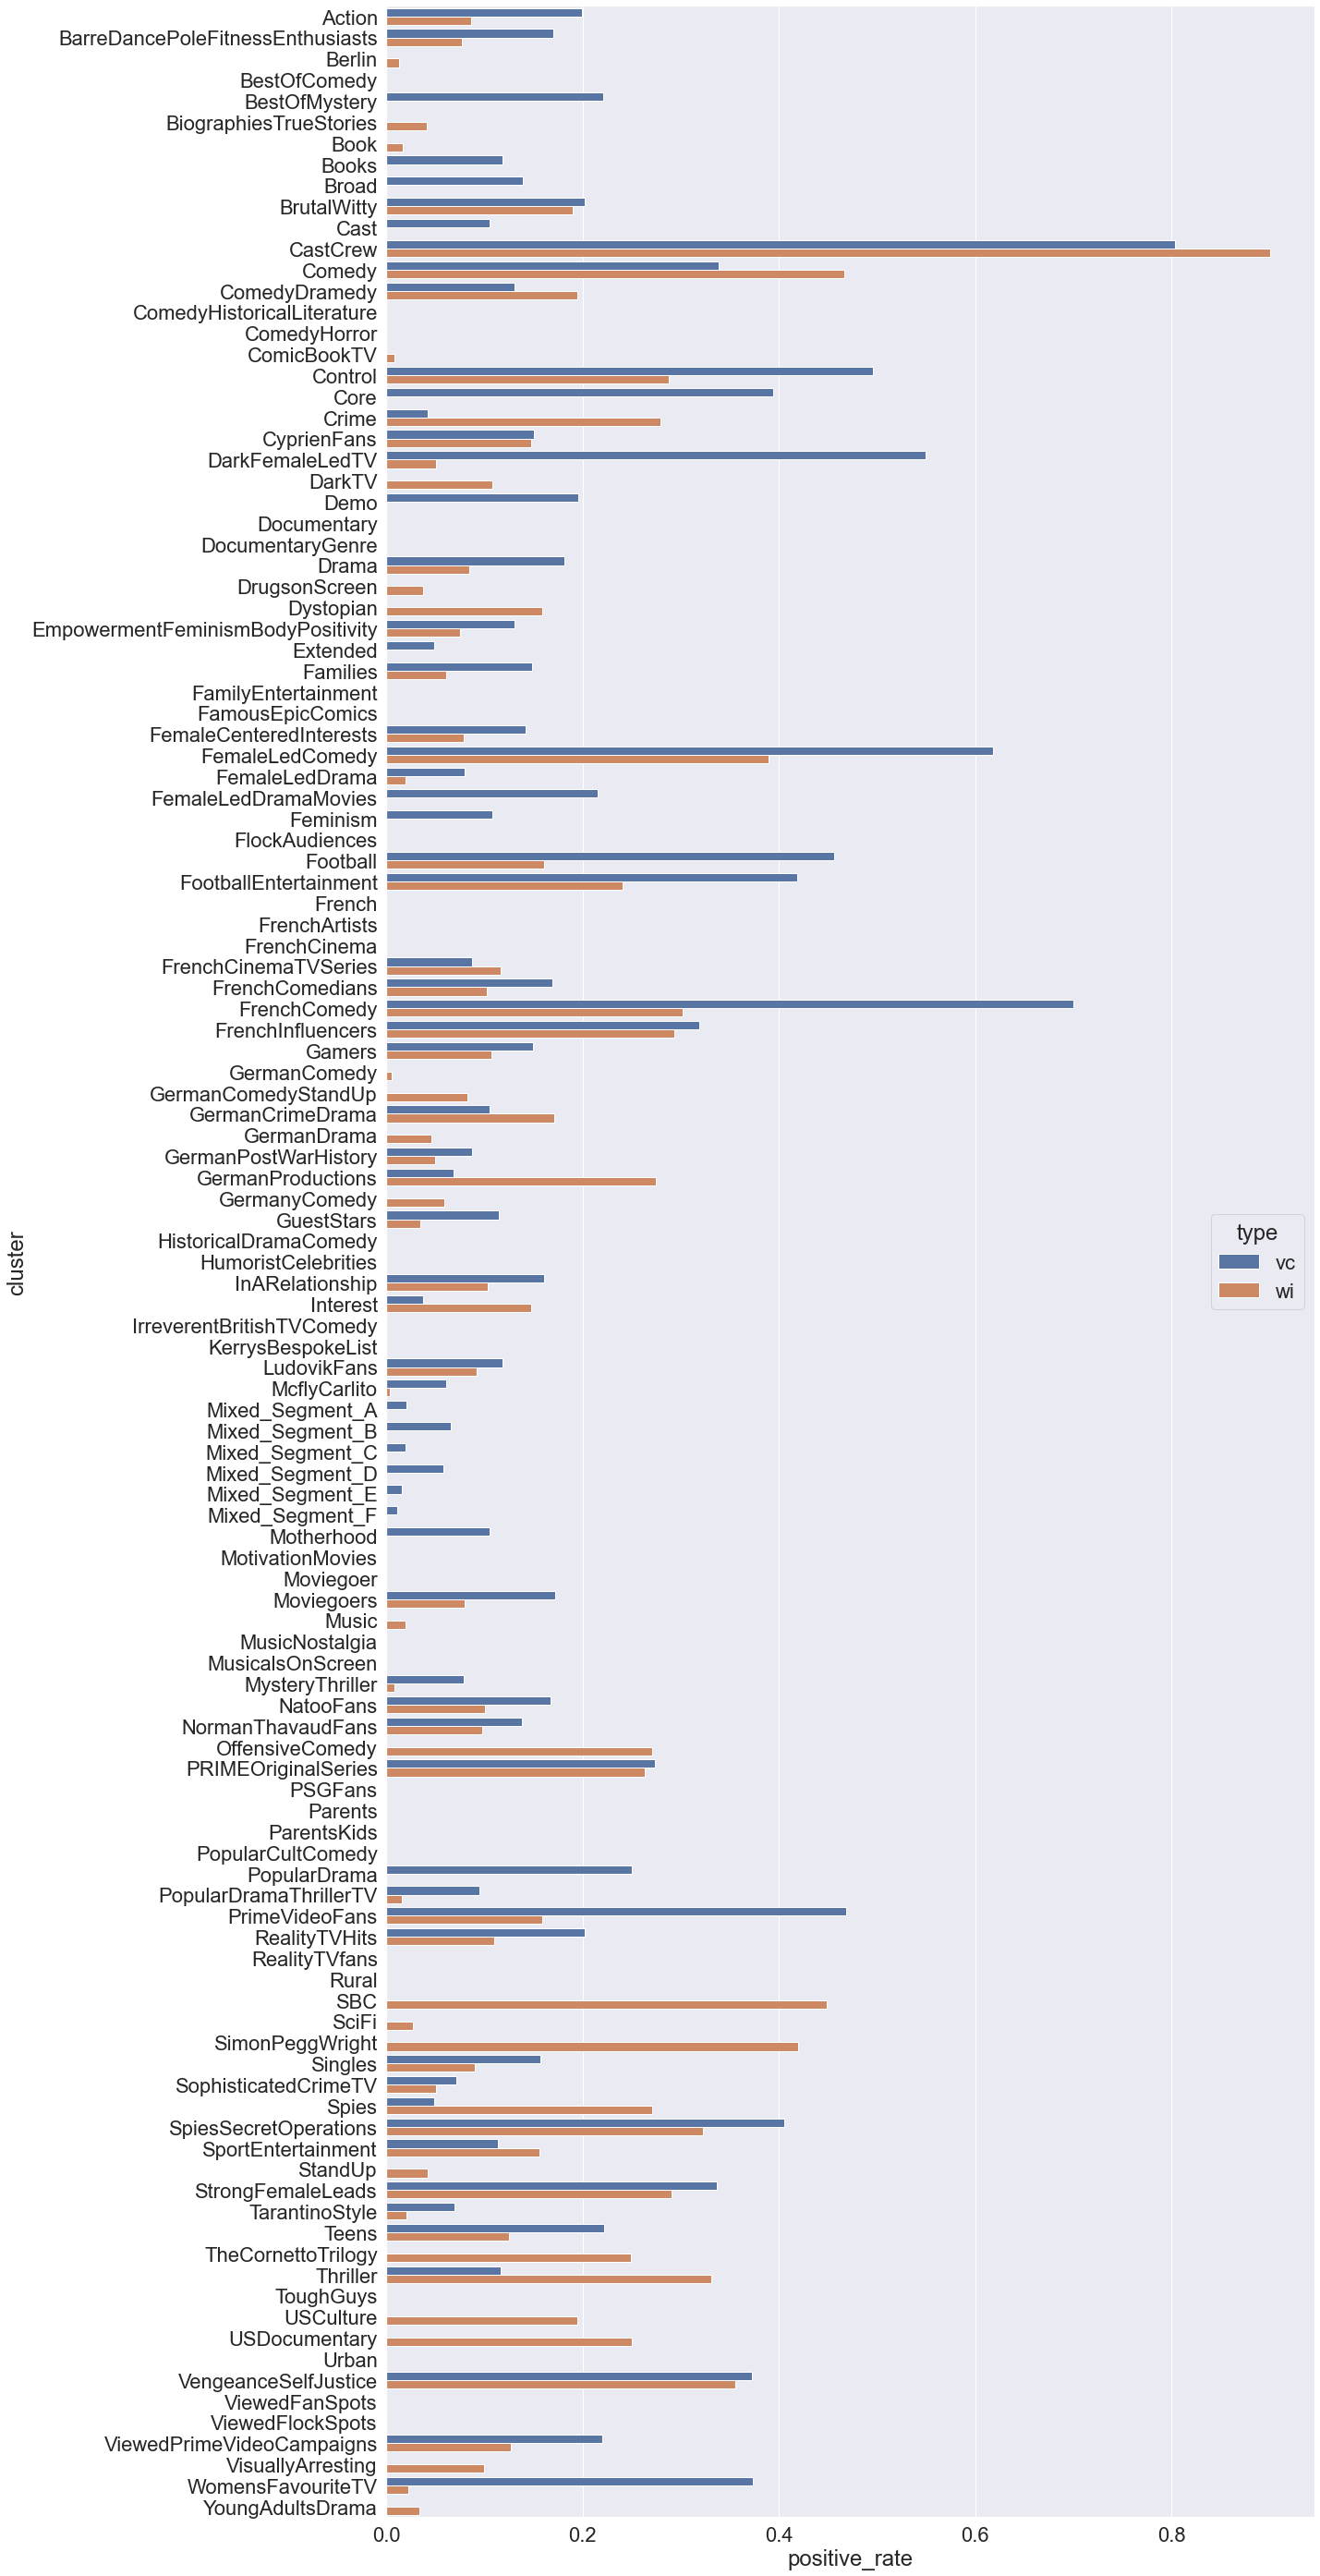

In [43]:
sns.set(font_scale=2)
fig_dims = (18, 50)
fig, ax = plt.subplots(figsize=fig_dims)
#sns.relplot(x= 'positive_rate', y ='cluster',data=cluster_by_yes, kind='bar', row = 'type');
sns.barplot(x= 'positive_rate', y ='cluster', hue='type', data=cluster_by_yes);


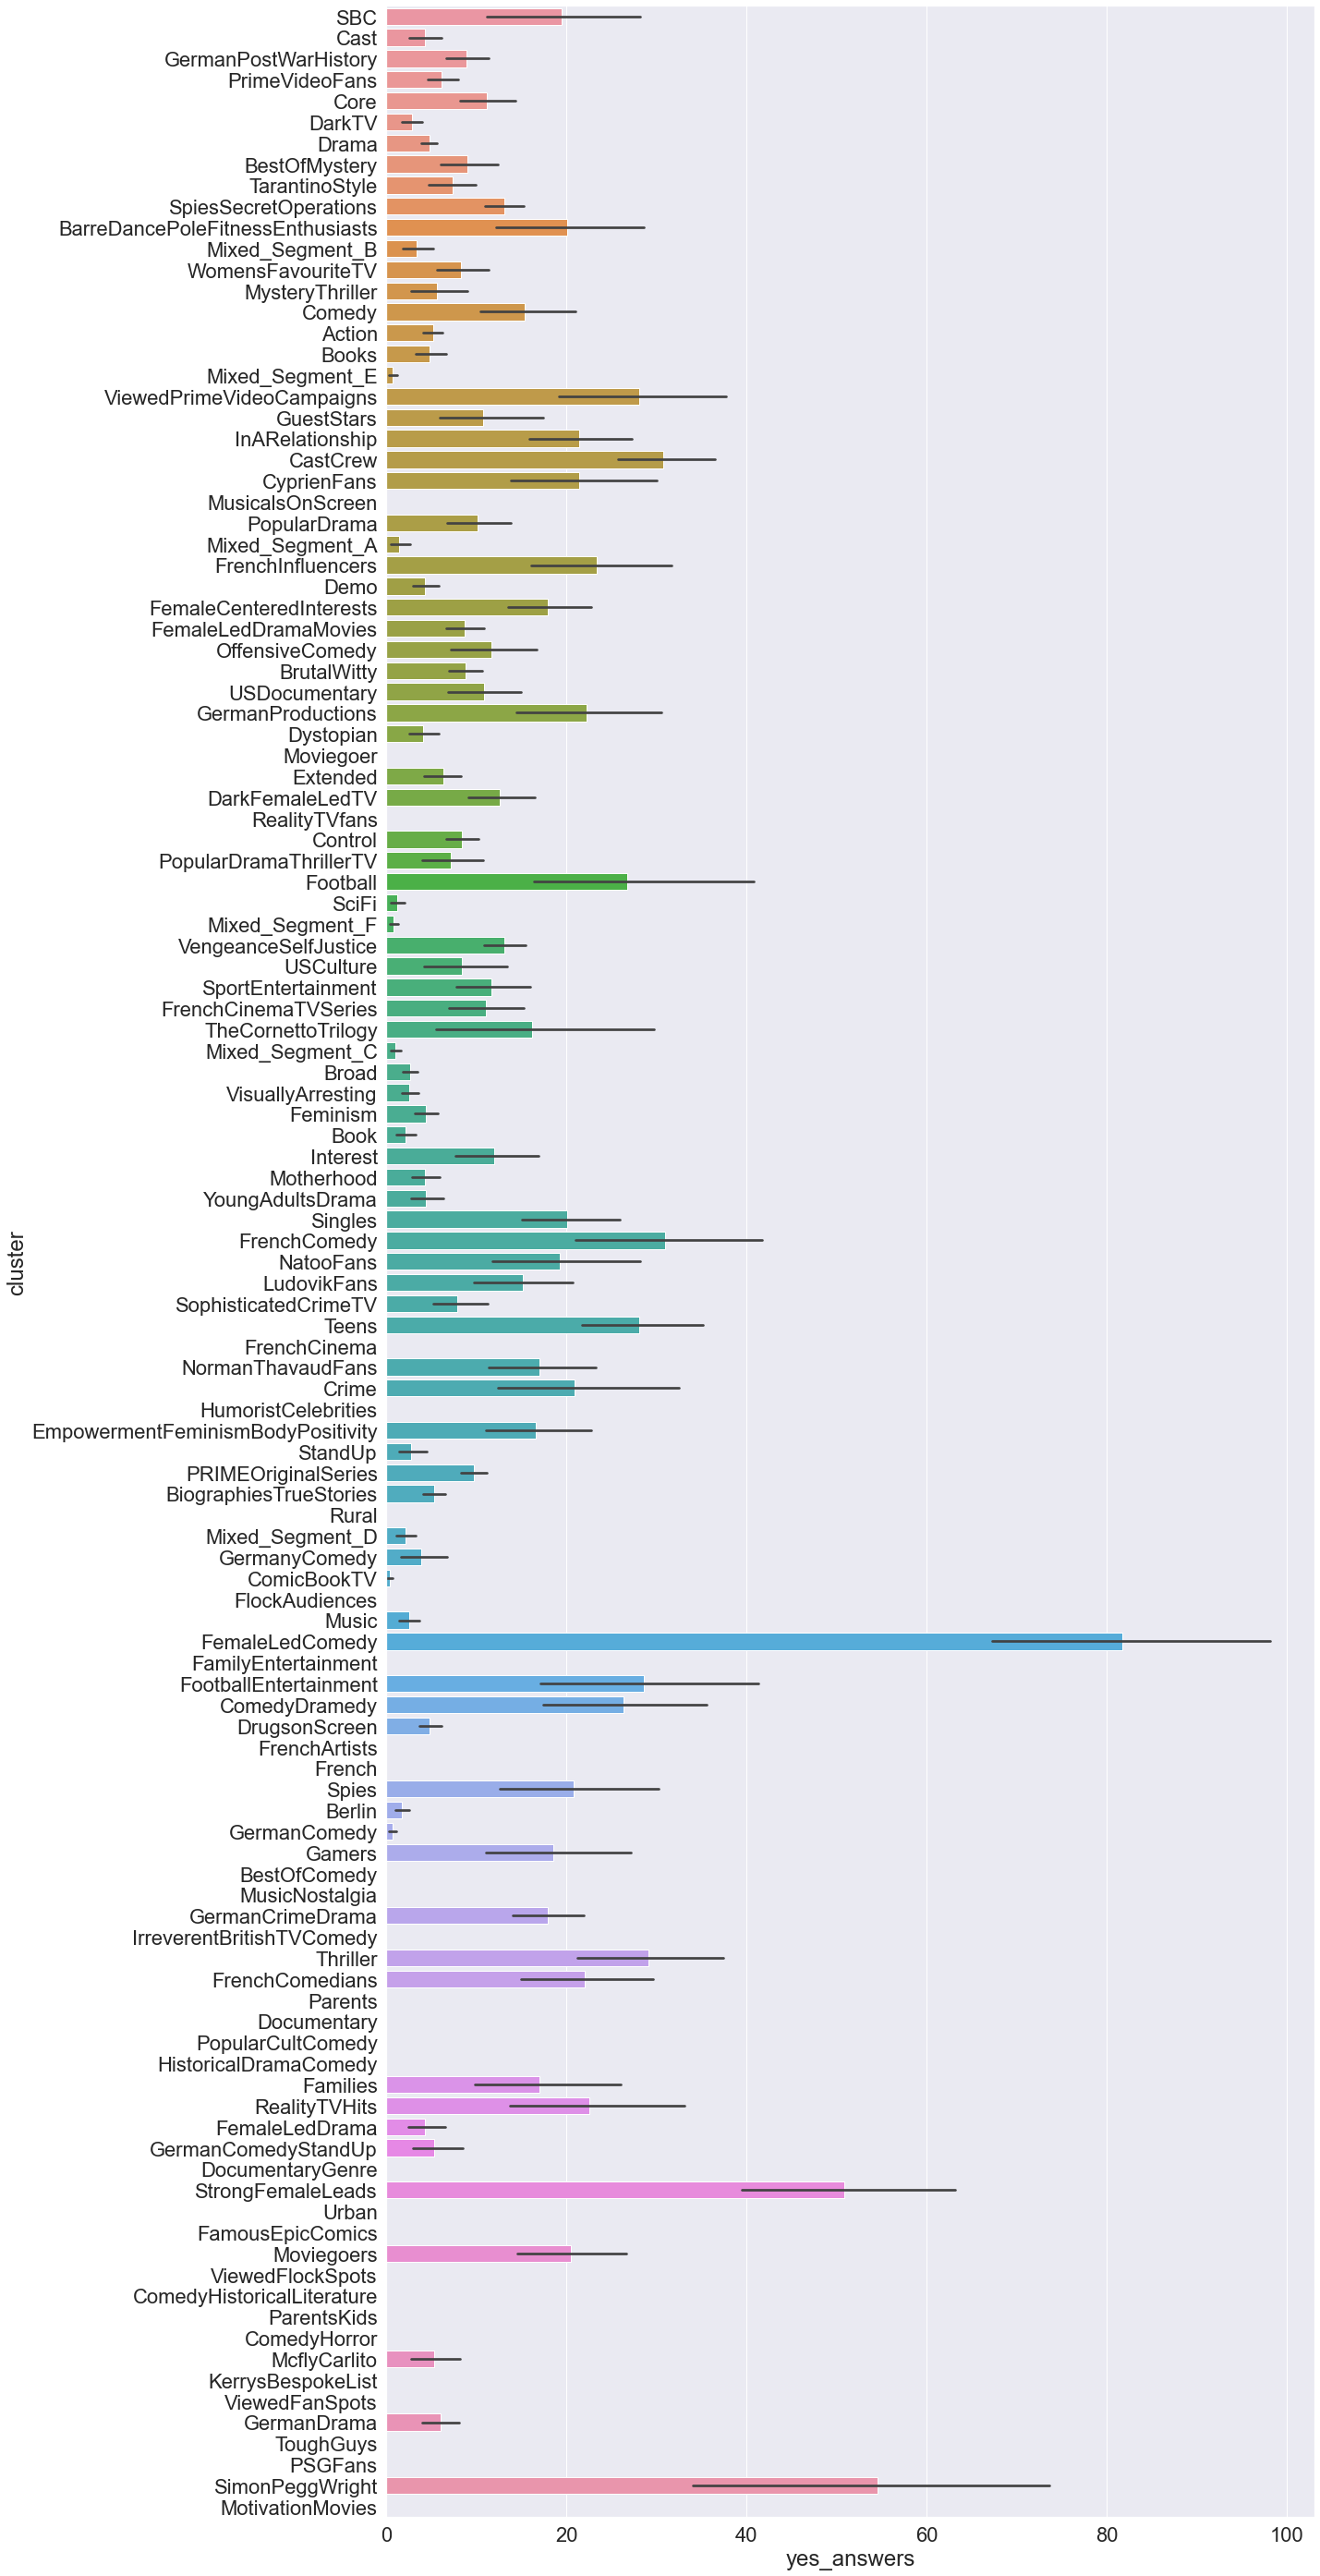

In [44]:
sns.set(font_scale=2)
fig_dims = (18, 50)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x= 'yes_answers', y ='cluster', data=data);

In [45]:
data.head()

,project_id,type,campaign_country,cluster,survey_date,release_date,impressions,yes_answers,no_answers,na_answers,gender,age_range,diff_survey_release,watching_rate_%,answer_rate,positive_rate
0,project_2,wi,AT,SBC,2020-10-10,2020-10-23,4855,13,3,1,FEMALE,18to24,13,76.470588,0.013095,0.010014
1,project_1,vc,ES,Cast,2020-08-18,2020-03-18,7224,4,8,10,FEMALE,25to34,-153,18.181818,0.016947,0.003081
2,project_4,wi,DE,GermanPostWarHistory,2020-07-15,2020-09-25,2216,13,10,8,MALE,18to24,72,41.935484,0.023880,0.010014
3,project_5,vc,FR,PrimeVideoFans,2020-04-29,2020-04-15,5957,7,32,14,MALE,18to24,-14,13.207547,0.040826,0.005392
4,project_4,vc,DE,Core,2020-10-13,2020-09-25,1462,14,10,9,MALE,O55,-18,42.424242,0.025420,0.010784


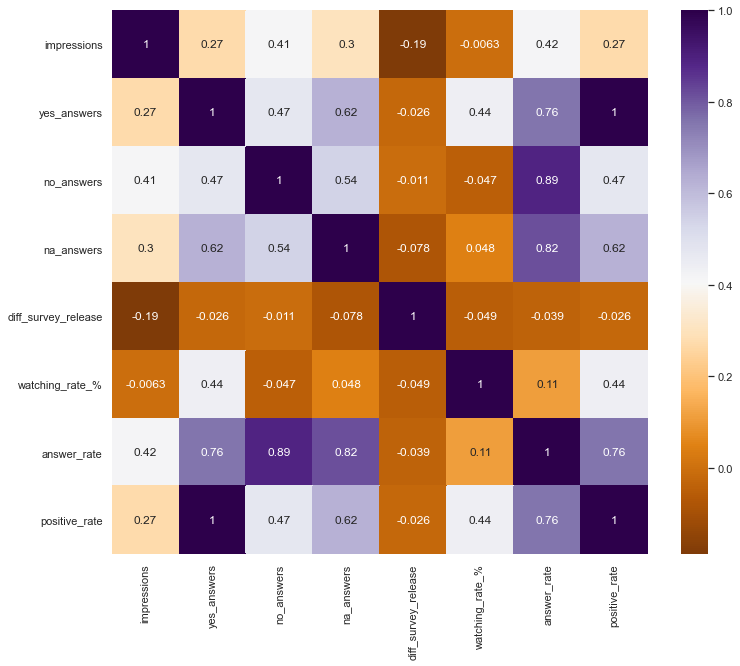

In [46]:
sns.set(font_scale=1)
corr = data.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            ax=ax,
            cmap='PuOr'
           )

In [47]:
data.drop(['answer_rate', 'positive_rate', 'na_answers'], axis=1, inplace=True)

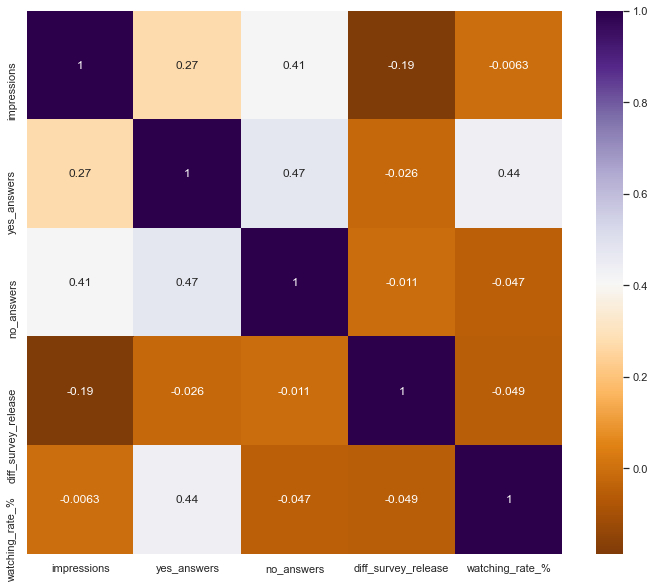

In [48]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            ax=ax,
            cmap='PuOr'
           )

In [49]:
data.to_csv(r'/Volumes/GoogleDrive/My Drive/Job Applications/JustWatch_challenge/data_clean.csv', index = False)

# Time Series Analysis

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054 entries, 0 to 3057
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   project_id           3054 non-null   object        
 1   type                 3054 non-null   object        
 2   campaign_country     3054 non-null   object        
 3   cluster              3054 non-null   object        
 4   survey_date          3054 non-null   datetime64[ns]
 5   release_date         3054 non-null   datetime64[ns]
 6   impressions          3054 non-null   int64         
 7   yes_answers          3054 non-null   int64         
 8   no_answers           3054 non-null   int64         
 9   gender               3054 non-null   object        
 10  age_range            3054 non-null   object        
 11  diff_survey_release  3054 non-null   int64         
 12  watching_rate_%      3054 non-null   float64       
dtypes: datetime64[ns](2), float64(1),

In [51]:
data['release_date'].value_counts()

2020-02-21    582
2020-09-25    488
2020-03-18    450
2020-10-23    422
2020-06-05    274
2020-04-15    272
2020-12-04    136
2020-10-30    130
2020-09-18    120
2020-09-15    100
2021-02-19     80
Name: release_date, dtype: int64

In [52]:
data['survey_date'].value_counts()

2020-11-06    320
2020-03-09    256
2019-11-29    243
2020-08-21    220
2020-07-07    220
2020-09-08    180
2020-04-10    136
2020-04-29    136
2020-09-14    136
2020-10-13    120
2020-05-15    118
2020-08-18    100
2020-07-12     96
2019-11-30     83
2020-05-10     80
2020-07-15     80
2020-10-23     80
2020-11-10     60
2020-10-09     60
2020-08-14     60
2020-10-10     50
2020-06-24     50
2020-09-21     48
2020-11-07     42
2020-06-23     30
2020-06-02     30
2020-07-30     20
Name: survey_date, dtype: int64

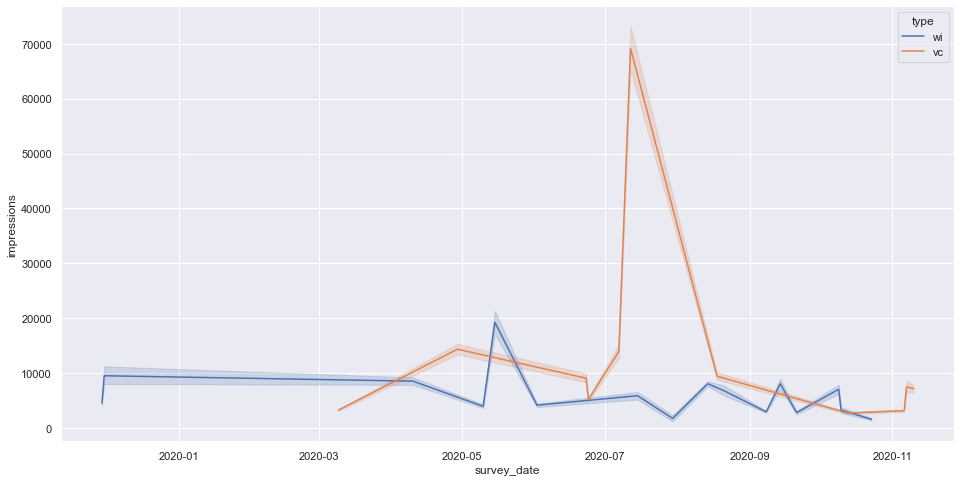

In [53]:
sns.lineplot(x="survey_date", y="impressions", hue='type', data = data);

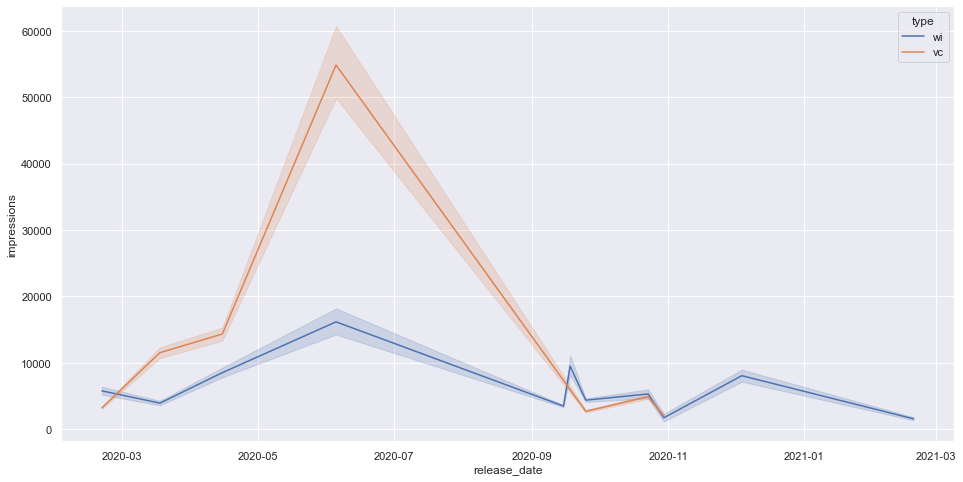

In [56]:
sns.lineplot(x="release_date", y="impressions", hue='type', data = data);

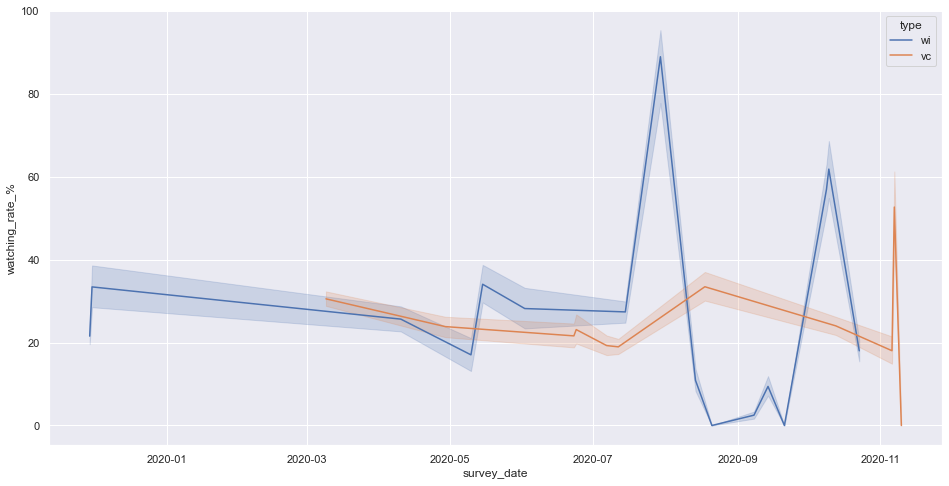

In [55]:
sns.lineplot(x="survey_date", y="watching_rate_%", hue='type', data = data);

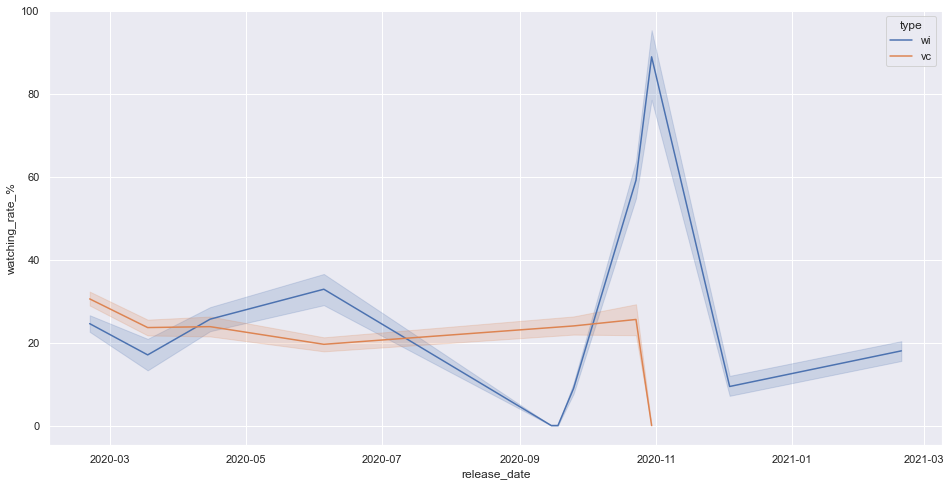

In [57]:
sns.lineplot(x="release_date", y="watching_rate_%", hue='type', data = data);

In [58]:
time_df = pd.DataFrame()
time_df["day"] = data["release_date"].dt.day

In [59]:
time_df["week"] = data["release_date"].dt.week
time_df["month"] = data["release_date"].dt.month
time_df["type"] = data['type']

In [60]:
time_df

,day,week,month,type
0,23,43,10,wi
1,18,12,3,vc
2,25,39,9,wi
3,15,16,4,vc
4,25,39,9,vc
...,...,...,...,...
3053,30,44,10,vc
3054,18,12,3,vc
3055,4,49,12,wi
3056,30,44,10,vc
